<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/main/project_4/%EB%B0%B0%ED%95%9C%EC%A7%84/scalp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np

# ML
import torch
import torchvision

import torchvision.transforms as transforms
from sklearn.model_selection import StratifiedKFold
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split


torch.manual_seed(123)

# Create Dataloader

## Load Data

In [ ]:
root_path = '/content/drive/MyDrive/data/scalp/'

# image_data = np.load(root_path + 'ImageData.npy')
# target = list(map(int,np.load(root_path + 'target.npy').tolist()))
image_data2 = np.load(root_path + 'ImageData2.npy')
target2 = list(map(int,np.load(root_path + 'target2.npy').tolist()))

In [ ]:
# print(image_data.shape)
# print(len(target))
print(image_data2.shape)
print(len(target2))

(13635, 224, 224, 3)
13635


## define transform

In [ ]:
# def get_transform():

#     t = list()
#     t.append(transforms.ToTensor())

#     t.append(transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)))
    
#     return transforms.Compose(t)

## define transform2

In [ ]:
from PIL import Image, ImageOps, ImageEnhance

In [ ]:
def get_transform_tr():
  transforms_train = transforms.Compose([
      transforms.ToTensor(),
      transforms.ToPILImage(),
      transforms.Resize((224, 224)),
      transforms.RandomHorizontalFlip(),
      transforms.RandomChoice([
          transforms.RandomResizedCrop(224),
          transforms.RandomAffine(
              degrees=15, translate=(0.2, 0.2),
              scale=(0.8, 1.2), shear=15)
      ]),
      transforms.ToTensor(),
      transforms.Normalize((0.4452, 0.4457, 0.4464), (0.2592, 0.2596, 0.2600)),
    ])
  return transforms_train

In [ ]:
def get_transform_te():
  transforms_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.4452, 0.4457, 0.4464), (0.2592, 0.2596, 0.2600)),
])
  return transforms_test

## define dataset

In [ ]:
# class CustomDataset(Dataset):
#     def __init__(self, img_list, label=None):
#         self.transform = get_transform()
#         self.img_list = img_list
#         self.label = label
#         self.transformed_img_list = list(map(self.transform, self.img_list))
#         print(self.transformed_img_list)
#     def __len__(self):
#         return len(self.img_list)
    
#     def __getitem__(self, i):
        
#         x_data = self.transformed_img_list[i]

#         return x_data, torch.tensor(self.label[i],dtype = torch.long)

## define dataset2

In [ ]:
class CustomDataset_tr(Dataset):
    def __init__(self, img_list, label=None):
        self.transform = get_transform_tr()
        self.img_list = img_list
        self.label = label
        self.transformed_img_list = list(map(self.transform, self.img_list))
        print(self.transformed_img_list)
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, i):
        
        x_data = self.transformed_img_list[i]

        return x_data, torch.tensor(self.label[i],dtype = torch.long)

In [ ]:
class CustomDataset_te(Dataset):
    def __init__(self, img_list, label=None):
        self.transform = get_transform_te()
        self.img_list = img_list
        self.label = label
        self.transformed_img_list = list(map(self.transform, self.img_list))
        print(self.transformed_img_list)
    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, i):
        
        x_data = self.transformed_img_list[i]

        return x_data, torch.tensor(self.label[i],dtype = torch.long)

## create image_data_l

In [ ]:
# image_data_l = []

# for i in image_data:
#   image_data_l.append(i)

In [ ]:
image_data_l2 = []

for i in image_data2:
  image_data_l2.append(i)

## Define Dataloader

In [ ]:
# import math

# def get_dataloader(x, y):
#     # img_list = get_img_list(x)
#     dataset = CustomDataset(img_list=x, label=y)


#     dataset_size = len(dataset)
#     train_size = int(dataset_size * 0.8)
#     validation_size = int(dataset_size * 0.1)
#     test_size = dataset_size - train_size - validation_size

#     train_dataset, validation_dataset, test_dataset = random_split(dataset, [train_size, validation_size, test_size])

#     train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size)
#     validation_dataloader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=batch_size)
#     test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size)


#     return train_dataloader, validation_dataloader, test_dataloader

## Define Dataloader 2

In [ ]:
import math

def get_dataloader_tr(x, y):
    # img_list = get_img_list(x)
    dataset = CustomDataset_tr(img_list=x, label=y)

    train_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size)

    return train_dataloader

def get_dataloader_te(x, y):
    # img_list = get_img_list(x)
    dataset = CustomDataset_te(img_list=x, label=y)

    test_dataloader = torch.utils.data.DataLoader(dataset=dataset, batch_size=batch_size)

    return test_dataloader

## Create Dataloader

In [ ]:
# batch_size = 64

# train_dataloader, validation_dataloader, test_dataloader  = get_dataloader(image_data_l, target)

## Create Dataloader2

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(image_data_l2, target2, test_size=0.2, shuffle=True, stratify=target2, random_state=34)

batch_size = 32

train_dataloader2 = get_dataloader_tr(x_train,y_train)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
valid_dataloader2 = get_dataloader_te(x_valid,y_valid)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
del x_valid
del y_valid
del x_train
del y_train

In [ ]:
# del image_data
del image_data2

In [ ]:
# del target
del target2

# VGG Model

In [ ]:
# !pip install cloud-tpu-client==0.10 torch==1.13.0 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.13-cp38-cp38-linux_x86_64.whl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-1.13-cp38-cp38-linux_x86_64.whl (151.3 MB)


In [ ]:
# import torch_xla
# import torch_xla.core.xla_model as xm

## device

In [ ]:
# dev = xm.xla_device()

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## load model from torch hub

In [ ]:
torch.cuda.empty_cache()
torch.cuda.memory_allocated()

0

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg19_bn', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

## freeze and change output layer

In [ ]:
model._modules['classifier'][6].out_features = 4
model._modules['classifier'][6].requires_grad = False

## define criterion optimizer

In [ ]:
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## define early stopping

In [ ]:
class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint2.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 7
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.to('cpu').state_dict(), self.path)
        self.val_loss_min = val_loss

## create early stopping

In [ ]:
early_stopping_2 = EarlyStopping(patience = 7)

In [ ]:
print(train_dataloader2)

## train

In [ ]:
loss_l = []
validloss_l = []
epoch_num = 100
accuracy_l = []
for epoch in range(epoch_num):
  model.train()
  model.to(device)
  for index, (data, target) in enumerate(train_dataloader2):
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()  # 기울기 초기화
    output = model(data)
    loss = criterion(output, target)
    loss.backward()  # 역전파
    optimizer.step()

  # model.to('cpu')
  model.eval()

  total = 0
  correct = 0
  for   index, (data, target) in enumerate(valid_dataloader2):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data,1)
    predicted = predicted
    target = target
    total += target.size(0)
    correct += (predicted == target).sum().item()
    valid_loss = criterion(output,target)
  print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')
  early_stopping_2(-100 * correct // total, model)
  if early_stopping_2.early_stop:
    print("Early stopping")
    break
  print(f"loss of {epoch} epoch, {loss.item():.3f} / valid loss: {valid_loss:.3f}")


  accuracy_l.append(100 * correct // total)
  loss_l.append(loss.item())
  validloss_l.append(valid_loss.item())


Accuracy of the network on the 2727 test images: 74 %
loss of 0 epoch, 0.315 / valid loss: 0.798
Accuracy of the network on the 2727 test images: 74 %
loss of 1 epoch, 0.321 / valid loss: 0.837
Accuracy of the network on the 2727 test images: 75 %
loss of 2 epoch, 0.317 / valid loss: 0.893
Accuracy of the network on the 2727 test images: 75 %
loss of 3 epoch, 0.242 / valid loss: 0.891
Accuracy of the network on the 2727 test images: 74 %
EarlyStopping counter: 1 out of 7
loss of 4 epoch, 0.229 / valid loss: 0.905
Accuracy of the network on the 2727 test images: 75 %
loss of 5 epoch, 0.193 / valid loss: 0.980
Accuracy of the network on the 2727 test images: 74 %
EarlyStopping counter: 1 out of 7
loss of 6 epoch, 0.183 / valid loss: 1.040
Accuracy of the network on the 2727 test images: 75 %
loss of 7 epoch, 0.134 / valid loss: 1.143


KeyboardInterrupt: ignored

In [ ]:
del data
del images
del target
del outputs
torch.cuda.empty_cache()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
model.load_state_dict(torch.load('/content/check1.pt'))
model.to(device)

## plot loss

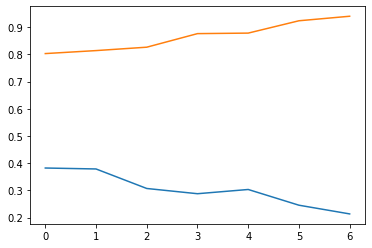

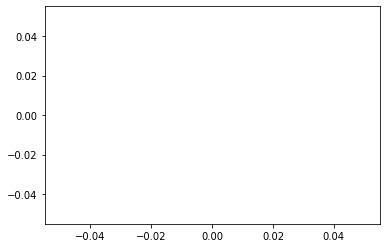

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_l, label = "train loss")
plt.plot(validloss_l, label = "valid loss")
plt.show()
plt.plot(accuracy_l, label="accuracy")
plt.show()

## model analysis

### confusion matrix

Accuracy of the network on the 2727 test images: 74 %


<function matplotlib.pyplot.show(*args, **kw)>

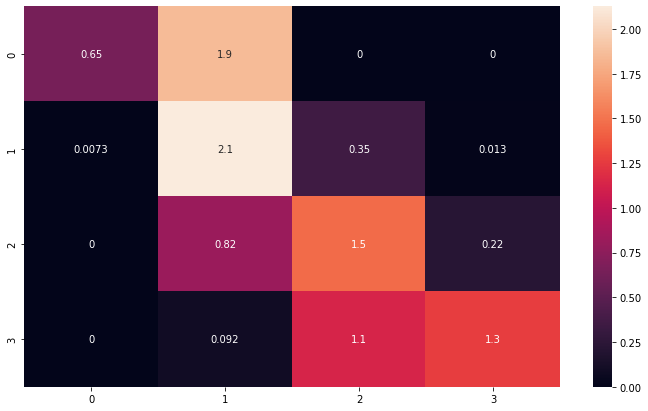

In [ ]:
model.eval()


y_pred = []
y_true = []

# iterate over test data
for index, (inputs, labels) in enumerate(valid_dataloader2):
        output = model(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

correct = 0
total = 0
with torch.no_grad():
    for data in valid_dataloader2:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = model(images.to(device))
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

classes = [0,1,2,3]


from sklearn.metrics import confusion_matrix
import seaborn as sns
# normalize = 'pred'
cf_matrix = confusion_matrix(y_true, y_pred, normalize = 'true')
df_cm_2 = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10,index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm_2, annot=True)
plt.show

In [ ]:
torch.save(model.to('cpu').state_dict(), 'check1.pt')

In [ ]:
del data
del images
del target
del outputs

In [ ]:
torch.cuda.empty_cache()

# Resnet Model

## load model from torch hub

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## change output layer

In [ ]:
n_inputs = model.fc.in_features

In [ ]:
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(n_inputs, 4))
]))

In [ ]:
model.fc = classifier
model.fc.requires_grad = False


In [ ]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## define criterion optimizer

In [ ]:
model.train()

criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

## create early stopping

In [ ]:
early_stopping_2 = EarlyStopping(patience = 5, path = 'resnet18.pt')

## train

In [ ]:
loss_l = []
validloss_l = []
epoch_num = 100
accuracy_l = []
for epoch in range(epoch_num):
  model.train()
  model.to(device)
  for index, (data, target) in enumerate(train_dataloader2):
    data = data.to(device)
    target = target.to(device)
    optimizer.zero_grad()  # 기울기 초기화
    output = model(data)
    loss = criterion(output, target)
    loss.backward()  # 역전파
    optimizer.step()

  model.eval()

  total = 0
  correct = 0
  for   index, (data, target) in enumerate(valid_dataloader2):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    _, predicted = torch.max(output.data,1)
    predicted = predicted
    target = target
    total += target.size(0)
    correct += (predicted == target).sum().item()
    valid_loss = criterion(output,target)
  print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')
  early_stopping_2(valid_loss, model)
  if early_stopping_2.early_stop:
    print("Early stopping")
    break
  print(f"loss of {epoch} epoch, {loss.item():.3f} / valid loss: {valid_loss:.3f}")


  accuracy_l.append(100 * correct // total)
  loss_l.append(loss.item())
  validloss_l.append(valid_loss.item())


Accuracy of the network on the 2727 test images: 67 %
loss of 0 epoch, 0.560 / valid loss: 0.967
Accuracy of the network on the 2727 test images: 71 %
loss of 1 epoch, 0.451 / valid loss: 0.829
Accuracy of the network on the 2727 test images: 74 %
EarlyStopping counter: 1 out of 5
loss of 2 epoch, 0.414 / valid loss: 0.841
Accuracy of the network on the 2727 test images: 75 %
EarlyStopping counter: 2 out of 5
loss of 3 epoch, 0.394 / valid loss: 0.868
Accuracy of the network on the 2727 test images: 75 %
EarlyStopping counter: 3 out of 5
loss of 4 epoch, 0.379 / valid loss: 0.899
Accuracy of the network on the 2727 test images: 76 %
EarlyStopping counter: 4 out of 5
loss of 5 epoch, 0.366 / valid loss: 0.933
Accuracy of the network on the 2727 test images: 76 %
EarlyStopping counter: 5 out of 5
Early stopping


## plot loss

In [ ]:
del data
del images
torch.cuda.empty_cache()

In [ ]:
model.load_state_dict(torch.load('/content/checkpoint.pt'))

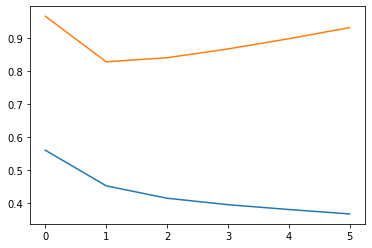

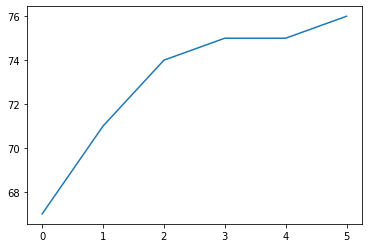

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_l, label = "train loss")
plt.plot(validloss_l, label = "valid loss")
plt.show()
plt.plot(accuracy_l, label="accuracy")
plt.show()

## confusion matrix

In [ ]:
output = model(torch.randn(1,3,128,128).to(device))
output.shape

torch.Size([1, 4])

Accuracy of the network on the 2727 test images: 76 %


<function matplotlib.pyplot.show(*args, **kw)>

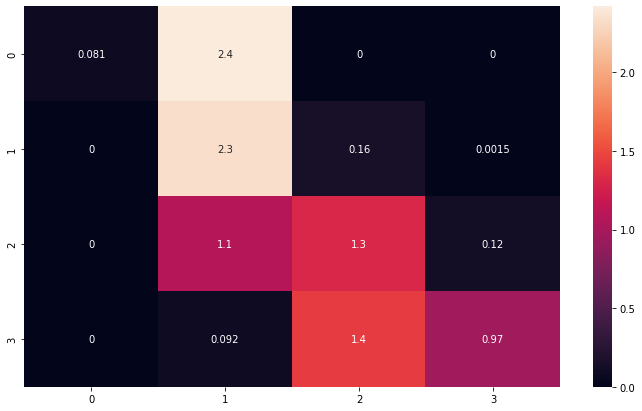

In [ ]:
model.eval()


y_pred = []
y_true = []

# iterate over test data
for index, (inputs, labels) in enumerate(valid_dataloader2):
        output = model(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

correct = 0
total = 0
with torch.no_grad():
    for data in valid_dataloader2:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = model(images.to(device))
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
print(f'Accuracy of the network on the {total} test images: {100 * correct // total} %')

classes = [0,1,2,3]


from sklearn.metrics import confusion_matrix
import seaborn as sns
# normalize = 'pred'
cf_matrix = confusion_matrix(y_true, y_pred, normalize = 'true')
df_cm_2 = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10,index = [i for i in classes],
                     columns = [i for i in classes])

plt.figure(figsize = (12,7))
sns.heatmap(df_cm_2, annot=True)
plt.show

In [ ]:
del data
del images
del target
del outputs
torch.cuda.empty_cache()